In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#warnings
import warnings
warnings.filterwarnings('ignore')

#load dataset

In [87]:
data=pd.read_csv('/content/Glass Identification Database.csv',header=None)

In [88]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Rename the column that not in dataset

In [89]:
column_names = [
    "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"
]

In [90]:
# Load the dataset
df= pd.read_csv("/content/Glass Identification Database.csv", header=None, names=column_names)


In [91]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#EDA(Explotary Data Analysis):-

In [92]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [93]:
#dataset check the null values
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [94]:
#check the duplicated the dataset
df.duplicated().sum()

1

In [95]:
#drop the duplicated column
df.drop_duplicates(inplace=True)

In [96]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


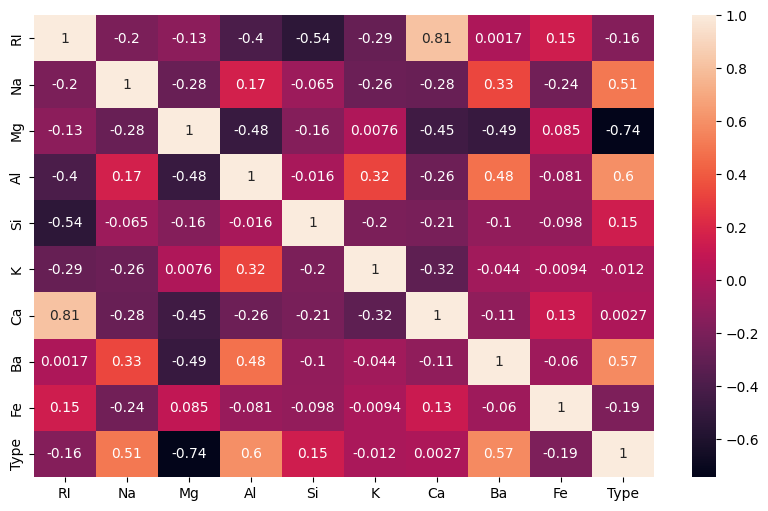

In [97]:
#data column correlation in graph
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [98]:
df['Type'].value_counts()

,count
Type,
2,76
1,69
7,29
3,17
5,13
6,9


Target  column:
  11. Type of glass: (class attribute)\
      -- 1 building_windows_float_processed\
      -- 2 building_windows_non_float_processed\
      -- 3 vehicle_windows_float_processed\
      -- 4 vehicle_windows_non_float_processed (none in this database)\
      -- 5 containers\
      -- 6 tableware\
      -- 7 headlamps

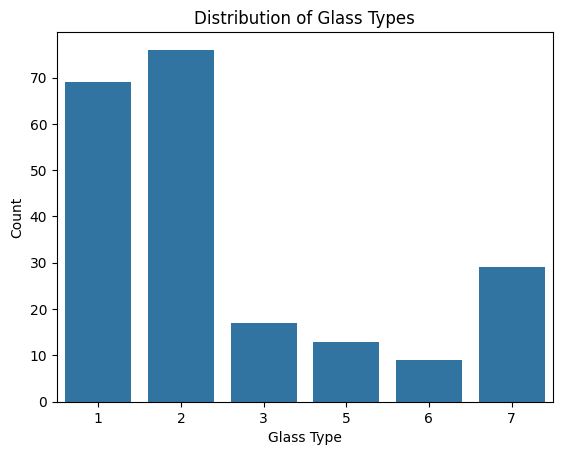

In [99]:
#type of glass value count bar
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()


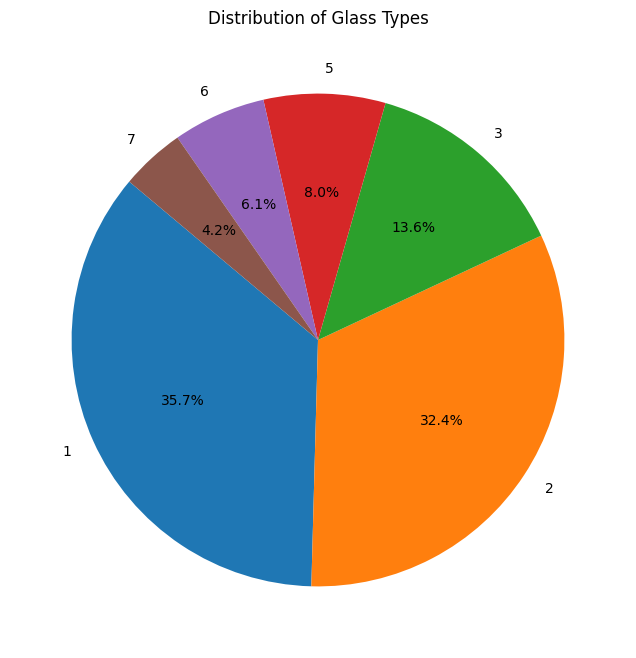

In [100]:
#pie chart distribution on glass type
plt.figure(figsize=(8, 8))
plt.pie(df['Type'].value_counts(), labels=df['Type'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Glass Types')
plt.show()

Pairplot of Important Features

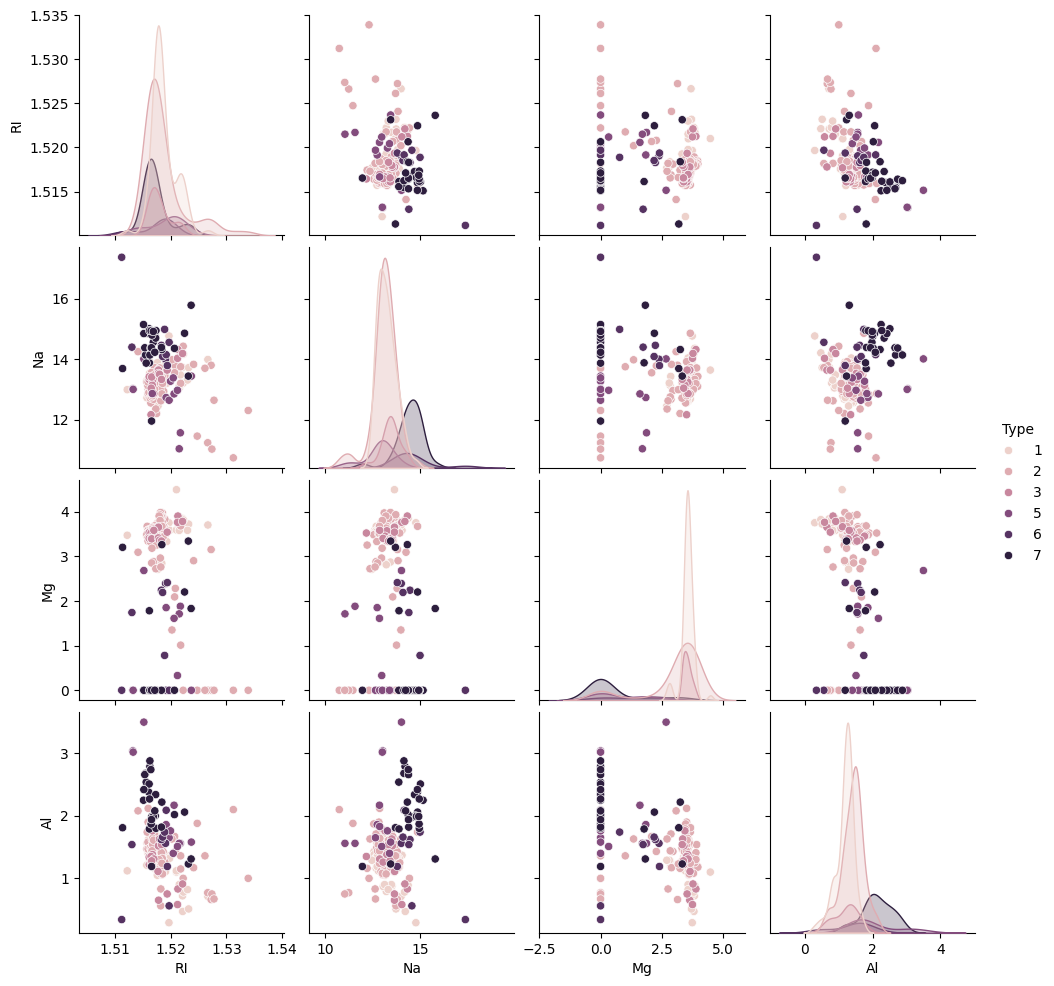

In [101]:
sns.pairplot(df, hue='Type', vars=['RI', 'Na', 'Mg', 'Al'])
plt.show()


#spliting the dataset

In [108]:
X=df.drop('Type',axis=1)
y=df['Type']  #target column type of glass

In [109]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [117]:
#shape of dataset
print("X_train shape:-", X_train.shape)
print("y_train shape:-", y_train.shape)
print("X_test shape:-", X_test.shape)
print("y_test shape:-", y_test.shape)

X_train shape:- (170, 9)
y_train shape:- (170,)
X_test shape:- (43, 9)
y_test shape:- (43,)


#Building model

In [111]:
# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [112]:
best_model = None
best_accuracy = 0
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print accuracy for each model
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")

    # Check if this is the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print("\nBest Model:", best_model)
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


Logistic Regression Accuracy: 62.79%
Random Forest Accuracy: 86.05%
K-Nearest Neighbors Accuracy: 65.12%
Support Vector Machine Accuracy: 34.88%

Best Model: RandomForestClassifier(random_state=42)
Best Accuracy: 86.05%


In [114]:
# Generate classification report for the best model
print("\nClassification Report for the Best Model:")
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Classification Report for the Best Model:
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.86      0.80      0.83        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.84      0.84      0.83        43
weighted avg       0.87      0.86      0.86        43



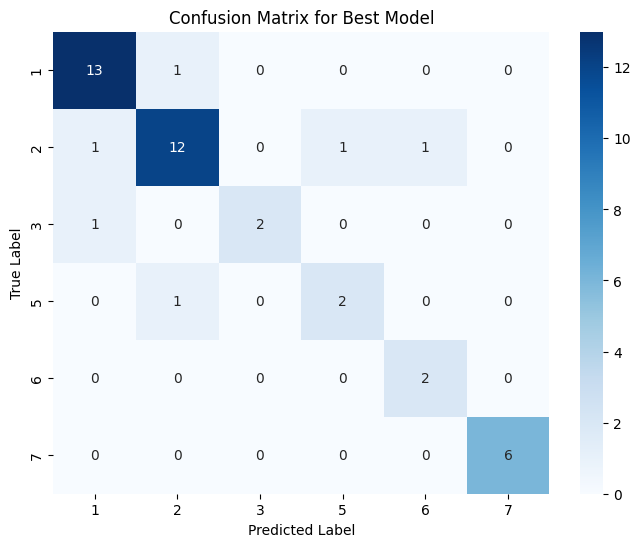

In [115]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Best Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#save the model

In [118]:
import joblib
# Save the best model to a file
joblib.dump(best_model, 'glass_classification_model.joblib')

print("Model saved as 'glass_classification_model.joblib'")


Model saved as 'glass_classification_model.joblib'


# Load the model

In [120]:
# Load the model
loaded_model = joblib.load('glass_classification_model.joblib')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
print(predictions)


[7 5 2 5 1 2 2 5 1 1 3 1 7 6 2 7 7 1 1 2 1 1 7 2 2 3 2 6 2 1 7 1 1 2 2 2 1
 1 2 1 1 2 6]
